# Proyek Sistem Rekomendasi


## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install kaggle

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

## Data Loading

In [3]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /content/kaggle.json
!kaggle datasets download -d aprabowo/indonesia-tourism-destination --force
!unzip indonesia-tourism-destination.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 432MB/s]
Archive:  indonesia-tourism-destination.zip
  inflating: package_tourism.csv     
  inflating: tourism_rating.csv      
  inflating: tourism_with_id.csv     
  inflating: user.csv                


### Dataset Destinasi Wisata

In [170]:
place = pd.read_csv('/content/tourism_with_id.csv')
place

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [171]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Dataset ini memiliki menjelaskan informasi tentang tempat wisata. Terdapat 437 baris tempat wisata dan 13 kolom terkait. Dalam dataset ini terdapat 5 kolom bertipe object, 3 kolom bertipe integer, dan 5 kolom bertipe float.

Pengecekan missing values

In [172]:
place.isna().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


Terdapat 2 kolom yang memiliki missing value, yaitu 232 missing values pada kolom Time_Minutes dan 437 missing values di kolom Unnamed: 11.

Ringkasan statistik dekriptif

In [173]:
place.describe().T

,count,mean,std,min,25%,50%,75%,max
Place_Id,437.0,219.000000,126.295289,1.000000,110.000000,219.000000,328.000000,437.000000
Price,437.0,24652.173913,66446.374709,0.000000,0.000000,5000.000000,20000.000000,900000.000000
Rating,437.0,4.442792,0.208587,3.400000,4.300000,4.500000,4.600000,5.000000
Time_Minutes,205.0,82.609756,52.872339,10.000000,45.000000,60.000000,120.000000,360.000000
Lat,437.0,-7.095438,0.727241,-8.197894,-7.749590,-7.020524,-6.829411,1.078880
Long,437.0,109.160142,1.962848,103.931398,107.578369,110.237468,110.431869,112.821662
Unnamed: 11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 12,437.0,219.000000,126.295289,1.000000,110.000000,219.000000,328.000000,437.000000


Hasil dari statistik deskriptif di atas menunjukkan biaya tiket masuk yang diperlukan berkisar dari Rp0 sampai Rp900.000. Sementara itu, beragam destinasi wisata dapat diakses dari pusat kota dalam 10 menit sampai 6 jam.

Mengecek duplikasi data

In [174]:
print("Jumlah duplikasi: ", place.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data duplikat dalam dataset ini

Melihat distribusi data

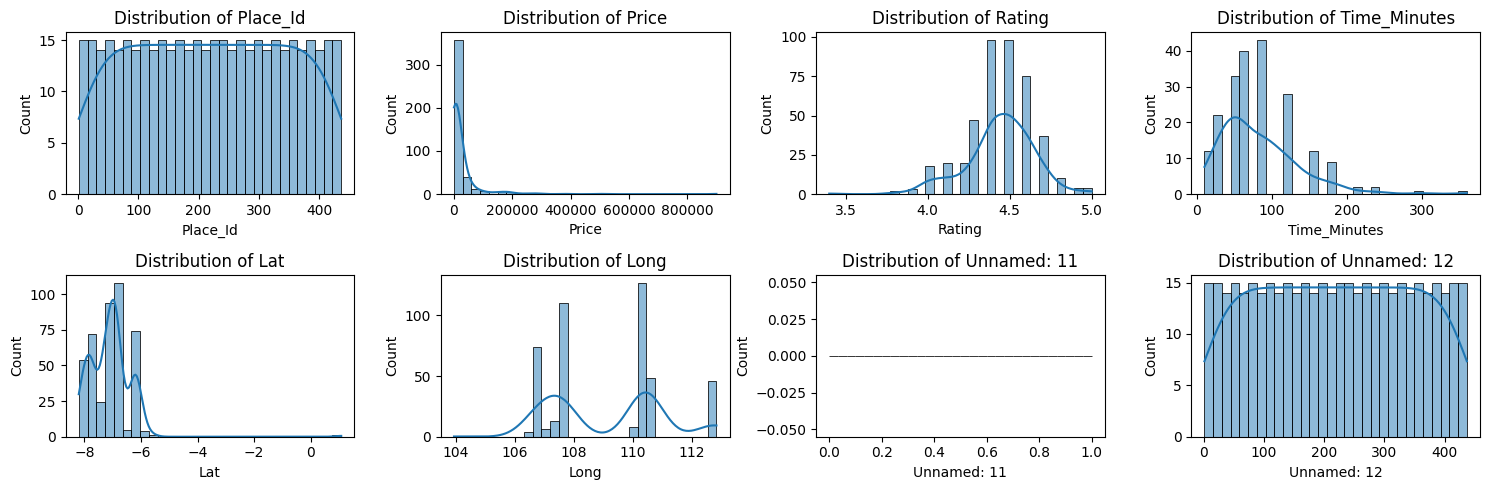

In [175]:
numeric_columns = place.select_dtypes(include='number').columns

plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(place[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Terdapat distribusi data yang tidak normal pada kolom numerik dalam dataset ini. Mayoritas destinasi wisata memiliki harga tiket masuk di bawah Rp50.000 dengan rating di antara 4 sampai 5. Selain itu, Mayoritas destinasi wisata dapat ditempuh kurang dari 100 menit dari pusat kota.

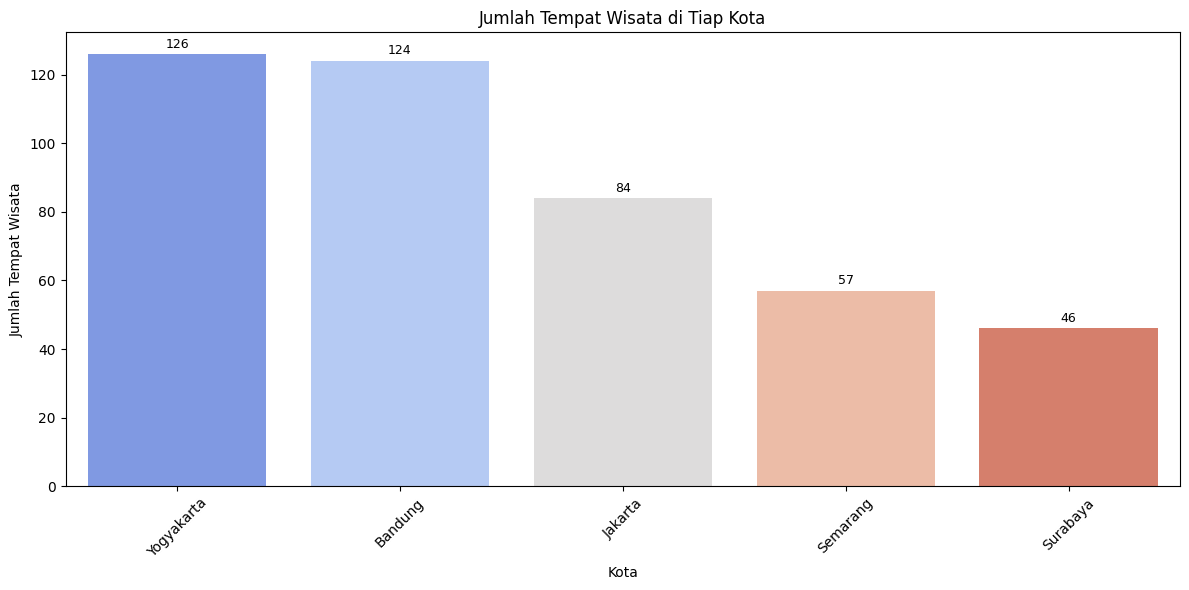

In [176]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=place['City'].value_counts().index,
    y=place['City'].value_counts().values,
    palette='coolwarm',
    hue=place['City'].value_counts().index,
    legend=False
)

for i, val in enumerate(place['City'].value_counts().values):
    ax.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=9)

plt.title('Jumlah Tempat Wisata di Tiap Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Tempat Wisata')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Destinasi wisata yang ada dalam dataset ini berada di 5 kota besar di Indonesia, yaitu Yogyakarta, Bandung, Jakarta, Semarang, dan Surabaya. Daerah Yogyakarta dan Bandung memiliki jumlah destinasi wisata paling banyak masing0masing 126 dan 124 destinasi. Surabaya memiliki destinasi wisata paling rendah yaitu 46 destinasi.

### Dataset Rating Destinasi Wisata

In [177]:
rating = pd.read_csv('/content/tourism_rating.csv')
rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [178]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Dalam dataset ini menginformasikan rating dari pengunjung yang dinerikan untuk destinasi wisata. Terdapat total 10.000 rating yang diberikan oleh pengunjung.

Pengecekan missing value

In [179]:
rating.isna().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


Dataset ini tidak memiliki missing values

In [180]:
print("Jumlah duplikasi: ", rating.duplicated().sum())

Jumlah duplikasi:  79


Terdapat 79 data duplikat yang terdeteksi.

Ringkasan statistik deskriptif

In [181]:
rating.describe().T

,count,mean,std,min,25%,50%,75%,max
User_Id,10000.0,151.2927,86.137374,1.0,77.00,151.0,226.0,300.0
Place_Id,10000.0,219.4164,126.228335,1.0,108.75,220.0,329.0,437.0
Place_Ratings,10000.0,3.0665,1.379952,1.0,2.00,3.0,4.0,5.0


Berdasarkan informasi di atas, diketahui terdapat total 10.000 rating yang diberikan oleh 300 pengunjung. Rating yang diberikan oleh pengunjung cukup beragam dari 1 sampai 5 atas pengalamannya saat mengunjungi destinasi wisata.

## Data Preparation

Mengisi missing values pada kolom Time_Minutes dengan median pada dataset destinasi wisata.

In [182]:
place['Time_Minutes'] = place['Time_Minutes'].fillna(place['Time_Minutes'].median())

Pengisian dengan median dipilih karena tidak dipengaruhi oleh nilai ekstrim sehingga tahan terhadap outlier. Selain itu, median juga lebih representatif untuk kolom yang memiliki distribusi tidak normal (skewed).

Drop data duplikat pada dataset rating destinasi wisata sehingga hanya tersisa data yang mengandung nilai unik.

In [183]:
rating = rating.drop_duplicates()

In [184]:
rating.shape

(9921, 3)

Sudah tidak ada missing values pada kolom-kolom yang akan digunakan dalma proyek ini.

Merge kedua dataset (destinasi wosata dan rating)

In [185]:
destination = rating.merge(place, on='Place_Id', how='left')

Drop kolom tidak relevan dengan proyek atau tidak memiliki informasi sehingga dataset mengandung informasi berkualitas.

In [186]:
destination = destination.drop(columns=['Description', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'])

In [187]:
destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9921 entries, 0 to 9920
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        9921 non-null   int64  
 1   Place_Id       9921 non-null   int64  
 2   Place_Ratings  9921 non-null   int64  
 3   Place_Name     9921 non-null   object 
 4   Category       9921 non-null   object 
 5   City           9921 non-null   object 
 6   Price          9921 non-null   int64  
 7   Rating         9921 non-null   float64
 8   Time_Minutes   9921 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 697.7+ KB


Berdasarkan hasil merge dataset, terdapat 9921 baris data dan 8 kolom yang dapat digunakan untuk membangun sistem rekomendasi

### Preparation for Content-based FIltering

Menyalin data yang akan digunakan untuk content-based filtering sehingga saat modeling tidak akan menggunakan data utama

In [188]:
datacb = destination[['User_Id', 'Place_Ratings', 'Place_Name', 'Category', 'City', 'Price', 'Time_Minutes']].drop_duplicates().copy()

In [189]:
datacb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9921 entries, 0 to 9920
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        9921 non-null   int64  
 1   Place_Ratings  9921 non-null   int64  
 2   Place_Name     9921 non-null   object 
 3   Category       9921 non-null   object 
 4   City           9921 non-null   object 
 5   Price          9921 non-null   int64  
 6   Time_Minutes   9921 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 542.7+ KB


In [190]:
datacb['Category'].value_counts()

,count
Category,
Taman Hiburan,3024
Budaya,2665
Cagar Alam,2397
Bahari,1072
Tempat Ibadah,382
Pusat Perbelanjaan,381


TF-IDF Vectorizer untuk menemukan representasi fitur penting dari setiap kategori destinasi

In [191]:
tf = TfidfVectorizer()
tfidf_matrix = tf.fit_transform(datacb['Category'])
tf.get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'cagar', 'hiburan', 'ibadah',
       'perbelanjaan', 'pusat', 'taman', 'tempat'], dtype=object)

Transformasi ke bentuk matriks

In [192]:
tfidf_matrix.shape

(9921, 10)

Mengubah vektor tf-idf dalam bentuk matriks

In [193]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        ...,
        [0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.70710678],
        [0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Melihat matriks tf-idf beberapa destinasi dan kategorinya

In [195]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=datacb.Place_Name
).sample(10, axis=1).sample(10, axis=0)

,hiburan,cagar,perbelanjaan,alam,ibadah,taman,budaya,bahari,tempat,pusat
Place_Name,,,,,,,,,,
Gua Belanda,0.000000,0.707107,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.000000,0.0
Taman Menteng,0.707107,0.000000,0.0,0.000000,0.000000,0.707107,0.0,0.0,0.000000,0.0
Monumen Bandung Lautan Api,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0
Gereja Tiberias Indonesia Bandung,0.000000,0.000000,0.0,0.000000,0.707107,0.000000,0.0,0.0,0.707107,0.0
Candi Borobudur,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0
Flower Farm Setiya Aji,0.000000,0.707107,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.000000,0.0
Masjid Raya Bandung,0.000000,0.000000,0.0,0.000000,0.707107,0.000000,0.0,0.0,0.707107,0.0
Curug Tilu Leuwi Opat,0.000000,0.707107,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.000000,0.0
Jurang Tembelan Kanigoro,0.707107,0.000000,0.0,0.000000,0.000000,0.707107,0.0,0.0,0.000000,0.0


## Modelling

Cosine Similarity, untuk mengidentifikasi korelasi antara tempat wisata dan kategorinya

In [196]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

Similarity matrix setiap destinasi

In [197]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=datacb['Place_Name'], columns=datacb['Place_Name'])
cosine_sim_df = cosine_sim_df.loc[:, ~cosine_sim_df.columns.duplicated()]

print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (9921, 437)


Place_Name,Taman Situ Lembang,Old City 3D Trick Art Museum,Jembatan Merah,Pantai Indrayanti,Kawah Rengganis Cibuni,Selasar Sunaryo Art Space,Air Terjun Kali Pancur,Kampung Wisata Sosro Menduran,Monumen Palagan Ambarawa,Kampung Batik Gedong Semarang
Place_Name,,,,,,,,,,
Panghegar Waterboom Bandung,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Wisata Mangrove Tapak,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Wisata Kaliurang,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Taman Balai Kota Bandung,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Museum Geologi Bandung,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Pantai Maron,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Seribu Batu Songgo Langit,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Taman Agrowisata Cilangkap,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Curug Cimahi,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Rekomendasi Top 20

In [198]:
def tourism_recommendations(Place_Name, similarity_data=cosine_sim_df, items=datacb[['Place_Name', 'Category']], k=20):
    if Place_Name not in similarity_data.columns:
        return f"'{Place_Name}' tidak ditemukan di similarity matrix."

    similarities = similarity_data[Place_Name]
    similarities = similarities.drop(Place_Name, errors='ignore')
    top_k = similarities.sort_values(ascending=False).head(k)

    top_k_df = top_k.reset_index()
    top_k_df.columns = ['Place_Name', 'Similarity']

    unique_items = items.drop_duplicates(subset='Place_Name')

    result = top_k_df.merge(unique_items, on='Place_Name')
    return result.drop_duplicates(subset='Place_Name').head(k)


In [237]:
datacb[datacb.Place_Name.eq('Taman Menteng')]

,User_Id,Place_Ratings,Place_Name,Category,City,Price,Time_Minutes
223,8,3,Taman Menteng,Taman Hiburan,Jakarta,0,60.0
230,9,3,Taman Menteng,Taman Hiburan,Jakarta,0,60.0
232,9,2,Taman Menteng,Taman Hiburan,Jakarta,0,60.0
338,12,5,Taman Menteng,Taman Hiburan,Jakarta,0,60.0
456,16,4,Taman Menteng,Taman Hiburan,Jakarta,0,60.0
1556,49,5,Taman Menteng,Taman Hiburan,Jakarta,0,60.0
2197,68,4,Taman Menteng,Taman Hiburan,Jakarta,0,60.0
2828,88,1,Taman Menteng,Taman Hiburan,Jakarta,0,60.0
2852,89,1,Taman Menteng,Taman Hiburan,Jakarta,0,60.0
3742,116,3,Taman Menteng,Taman Hiburan,Jakarta,0,60.0


In [238]:
tourism_recommendations('Taman Menteng')

,Place_Name,Similarity,Category
0,Waterpark Kenjeran Surabaya,1.0,Taman Hiburan
1,Tugu Pal Putih Jogja,1.0,Taman Hiburan
2,Embung Tambakboyo,1.0,Taman Hiburan
3,Atlantis Water Adventure,1.0,Taman Hiburan
4,Taman Kunang-Kunang,1.0,Taman Hiburan
5,Taman Ekspresi Dan Perpustakaan,1.0,Taman Hiburan
6,Wisata Agro Edukatif Istana Susu Cibugary,1.0,Taman Hiburan
7,Bumi Perkemahan Cibubur,1.0,Taman Hiburan
8,Atlantis Land Surabaya,1.0,Taman Hiburan
9,Taman Tabanas,1.0,Taman Hiburan


Rekomendasi destinasi setiap pengunjung

In [259]:
ground_truth = datacb[datacb['Place_Ratings'] >= 3] \
                   .groupby('User_Id')['Place_Name'].apply(list).to_dict()

train_data = {}
test_data = {}

for User_Id, places in ground_truth.items():
    if len(places) < 3:
        continue
    train, test = train_test_split(places, test_size=3, random_state=42)
    train_data[User_Id] = train
    test_data[User_Id] = test

In [261]:
predicted = {}

for User_Id, liked_places in train_data.items():
    recs = []

    for place in liked_places:
        try:
            result_df = tourism_recommendations(place, k=20)
            recs.extend(result_df['Place_Name'].tolist())
        except:
            continue

    seen = set()
    final_recs = []
    for item in recs:
        if item not in seen:
            final_recs.append(item)
            seen.add(item)

    predicted[User_Id] = final_recs[:20]

In [262]:
User_Id = 120
print(f"Rekomendasi untuk User {User_Id}:")

for i, place in enumerate(predicted[User_Id], 1):
    print(f"{i}. {place}")

Rekomendasi untuk User 120:
1. Tugu Pal Putih Jogja
2. Surabaya North Quay
3. Embung Tambakboyo
4. Waterpark Kenjeran Surabaya
5. Dusun Bambu
6. Taman Pintar Yogyakarta
7. Hutan Kota Srengseng
8. Puncak Pinus Becici
9. Atlantis Land Surabaya
10. Bumi Perkemahan Cibubur
11. Wisata Agro Edukatif Istana Susu Cibugary
12. Taman Ekspresi Dan Perpustakaan
13. Panama Park 825
14. Waterboom PIK (Pantai Indah Kapuk)
15. Taman Tabanas
16. Dago Dreampark
17. Kampung Batu Malakasari
18. Tektona Waterpark
19. Masjid Kapal Semarang
20. Klenteng Jin De Yuan


## Evaluasi

Membuat fungsi untuk metrik evaluasi

In [263]:
def precision_at_k(y_true, y_pred, k):
    if not y_pred: return 0
    return len(set(y_true) & set(y_pred[:k])) / k

def recall_at_k(y_true, y_pred, k):
    if not y_true: return 0
    return len(set(y_true) & set(y_pred[:k])) / len(set(y_true))

def f1_at_k(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

def average_precision(y_true, y_pred, k):
    if not y_true: return 0
    score = 0.0
    num_hits = 0.0
    for i, p in enumerate(y_pred[:k]):
        if p in y_true:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    return score / min(len(y_true), k)

def ndcg_at_k(y_true, y_pred, k):
    def dcg(relevance_scores):
        return sum(rel / np.log2(idx + 2) for idx, rel in enumerate(relevance_scores))

    y_pred_k = y_pred[:k]
    relevance = [1 if item in y_true else 0 for item in y_pred_k]
    ideal_relevance = sorted(relevance, reverse=True)

    dcg_val = dcg(relevance)
    idcg_val = dcg(ideal_relevance)

    return dcg_val / idcg_val if idcg_val > 0 else 0

In [264]:
k = 20
precisions, recalls, f1s, maps, ndcgs = [], [], [], [], []

for User_Id in test_data:
    y_true = test_data.get(User_Id, [])
    y_pred = predicted.get(User_Id, [])

    if not y_pred or not y_true:
        continue

    p = precision_at_k(y_true, y_pred, k)
    r = recall_at_k(y_true, y_pred, k)
    f1 = f1_at_k(p, r)
    ap = average_precision(y_true, y_pred, k)
    ndcg = ndcg_at_k(y_true, y_pred, k)

    precisions.append(p)
    recalls.append(r)
    f1s.append(f1)
    maps.append(ap)
    ndcgs.append(ndcg)

print(f'Precision@{k}: {np.mean(precisions):.4f}')
print(f'Recall@{k}:    {np.mean(recalls):.4f}')
print(f'F1@{k}:         {np.mean(f1s):.4f}')
print(f'MAP@{k}:        {np.mean(maps):.4f}')
print(f'NDCG@{k}:       {np.mean(ndcgs):.4f}')

Precision@20: 0.0057
Recall@20:    0.0378
F1@20:         0.0099
MAP@20:        0.0052
NDCG@20:       0.0357


Hasil evaluasi tersebut menunjukkan bahwa model yang dibangun belum optimal dalam memberikan rekomendasi destinasi wisata kepada pengunjung.
- Precision@20: 0.0057, berarti sistem ini dapat memberikan banyak rekomendasi destinasi tetapi hanya 0,57% yang relevan dan disukai oleh user.
- Recall@20: 0.0378, berarti sistem rekomendasi hanya mencakup sebagian sebagian kecil item yang relevan, di mana dari semua tempat yang seharusnya direkomendasikan, hanya 3,78% di antaranya yang berhasil ditemukan.
- F1@20: 0.0099, menunjukkan sistem yang tidak seimbang antara ketepatan dan cakupannya.
- MAP@20: 0.0052, berarti bahwa item yang relevan jarang muncul di urutan awal sehingga tidak terlihat oleh user.
- NDCG@20: 0.0357, menunjukkan urutan rekomendasi yang belum baik karena item relevan banyak muncul di posisi bawah.

Proyek ini sudah bisa memberikan rekomendasi destinasi wisata kepada pengunjung, tetapi dari beragam item yang direkomendasikan, item yang relevan dengan preferensi pengunjung masih jarang diberikan/diterima oleh pengunjung.